# Normal Distribution
<a id="top"></a>

# Contents

 - [Introduction](#introduction)
 - [Python Imports](#imports)
 - [From Binomial to Normal Distribution](#binomialtonorm)
 - [Mean and Standard Deviation in Normal Distribution](#muandsigma)
 - [Generate a sample of random normal data](#generatesample)
     - [Tests for Normal Distribution](#testnormal1)
        1. [Visual Method Using a Histogram](#histtest1)
        2. [Visual Method Using a Q-Q Plot](#qqplottest1)
        3. [Formal Statistical Test: Shapiro-Wilk Test](#shapirowilktest1)
        4. [Formal Statistical Test: Kolmogorov-Smirnov Test](#kolmogorovsmirnovtest1)
        - [Test if Mean, Mode and Median are equal](#meanmedianmode)
 - [Generate Non-normal Distribution](#generatenonnormal)
     - [Tests for Normal Distribution](#testnormal2)
         1. [Visual Method Using a Histogram](#histtest2)
         2. [Visual Method Using a Q-Q Plot](#qqplottest2)
         3. [Formal Statistical Test: Shapiro-Wilk Test](#shapirowilktest2)
         4. [Formal Statistical Test: Kolmogorov-Smirnov Test](#kolmogorovsmirnovtest2)
 - [Normally Distributed Data Sample from Kaggle](#normalkaggle)
     - [Tests for Normal Distribution](#testnormal3)
         1. [Visual Method Using a Histogram](#histtest3)
              - [Step-by-Step Drawing of Histogram](#stepbystephist)
         2. [Visual Method Using a Q-Q Plot](#qqplottest3)
         3. [Formal Statistical Test: Shapiro-Wilk Test](#shapirowilktest3)
         4. [Formal Statistical Test: Kolmogorov-Smirnov Test](#kolmogorovsmirnovtest3)
 - [Test for Empirical Rules](#empiricalrules)
      - [Empirical Rules on Normally Distributed Generated Data](#empiricalnormgenerated)
          - [Test Results of Empirical Rules on Normally Distributed Generated Data](#empiricalnormgenresults)
      - [Empirical Rules on Non-Normally Distributed Generated Data](#empiricalnonnormgenerated)
          - [Test Results of Empirical Rules on Non- Normally Distributed Generated Data](#empiricalnonnormgenresults)
      - [Empirical Rules on Normally Distributed Data from Kaggle](#empiricalnormkaggle)
          - [Test Results of Empirical Rules on Normally Distributed Data from Kaggle](#empiricalnormkaggleresults)
 - [Test for Skewness (Symmetry)](#skewness)
     - [Test for Skewness on datasets](#skewtest)
 - [Test for Kurtosis](#kurtosis)
     - [Test for Kurtosis on datasets](#kurtosistest)
 - [The Probability Density Function](#probdensityfunc)
     - [Generating Normal Data from the Mean and Standard Deviation Using PDF](#gendatafrompdf)
 - [The Cumulative Distribution Function](#cumuldistfunc)
 - [The Probability Point Function](#probpointfunc)
 - [Central Limit Theorem](#centrallimit)
     - [Central Limit Theorem - Example](#clt-example)
     - [Central Limit Theorem Example on Chi-Square Distributed Data](#clt-chisquare)
         - [Original Data Plotted](#cltplotoriginal)
         - [Mean of Samples Plotted](#cltplotsamplemeans)
 - [Conclusion](#conclusion)
 - [Bibliography](#Bibliography)

<a id="introduction"></a>
## Introduction

[Back To Top](#top)

Normal distribution is also known as the Gaussian distribution. It was first discovered by Carl Friedrich Gauss, hence the name. (Chen 2022)

All distributions describe how the values of a variable are distributed.

Normal Distribution describes the distribution of values for many natural phenomena, for example height of adult males in Ireland, IQ scores, etc. Something to note is that normal distributions are generally more suited to large datasets and often data that is expected to be normally distributed is not so in smaller numbers, for example if I collected the IQ of 10 adults, the values may not be normally distributed, if I were to get the IQ of 100,000 adults, they would almost certainly be normally distributed.

It is a very important probability distribution in statistics. It is a continuous probability distribution that is symmetrical around it's mean. When plotted on a graph it will give you what is commonly known as a __Bell Curve__ (Evans 2017)

Normal distribution was a natural progression from the binomial distribution. In the 18th Century, Abraham de Moivre "noted that when the number of events (coin flips) increased, the shape of the binomial distribution approached a very smooth curve", the normal distribution curve (Lane, 2014). See [From Binomial to Normal Distribution](#binomialtonorm).

There are many normal distributions. The Standard normal Distribution is one which has a  mean of 0 and a standard deviation of 1.

Normal Distribution has the following properties (CFI Team 2022):

* "It is symmetrical", meaning it can be divided down the middle and each half would be equal.

* It's mean, mode and median are equal

* Empirical rule - The data in a Normally distributed dataset lies at a constant distance from the mean, for example approximately:
    * 68% of the data falls within one standard deviation of the mean
    * 95% of the data falls within two standard deviations of the mean
    * 99% of the data falls within three standard deviations of the mean
    
* Skewness, which measures the symmetry of a distribution in Normal Distribution is zero.
 
* Kurtosis, which measures the size of the 2 tails combined, in Normal distribution is equal to 3. If Kurtosis is greater than 3 the dataset has heavier tails and if the kurtosis is less than 3 it's tails are lighter. Excess Kurtosis is calculated by subtracting the kurtosis from 3, thus giving the Normal Distribution an excess Kurtosis of zero.
 
 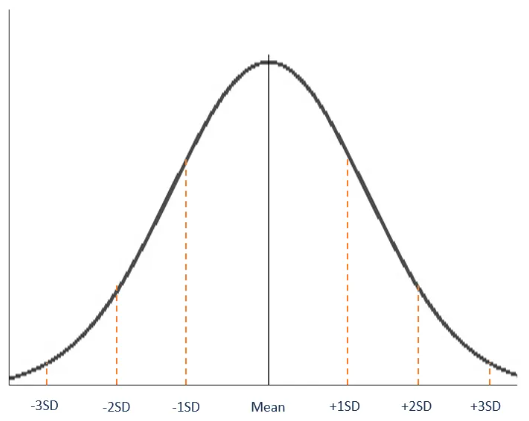
 <center>(CFI Team 2022)</center>

<a id="imports"></a>

## Python Imports

[Back To Top](#top)

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import pylab as py
import seaborn as sns
import math
import statistics

<a id="binomialtonorm"></a>
## From Binomial to Normal Distribution

[Back To Top](#top)

Here we can see the plot of 2, 4 and 10 coin tosses using the binomial random number generator. It clearly shows the normal distribution curve, particularly as the sample size gets larger.

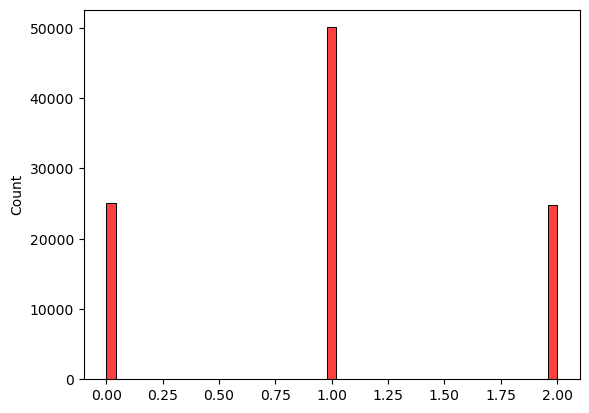

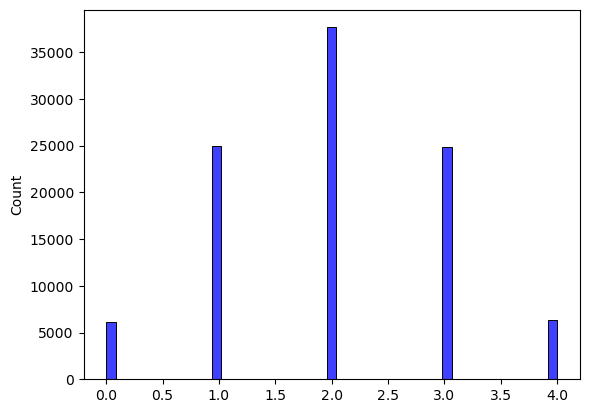

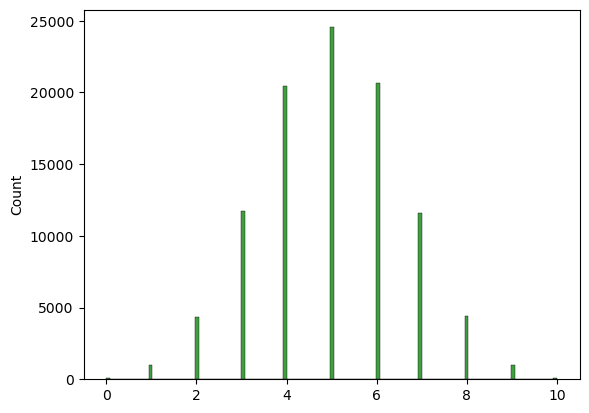

In [91]:
#from numpy import random
#import matplotlib.pyplot as plt
#import seaborn as sns
#import statistics

def plot_coin_toss(n, c):
    A = []
    p = 0.5
    for i in range(100000):
        flip = np.random.binomial(n,p)
        A.append(flip)
    plt.figure()
    sns.histplot(A, color = c)
    
plot_coin_toss(2, "red")
plot_coin_toss(4, "blue")
plot_coin_toss(10, "green")

<a id="muandsigma"></a>
## Mean and Standard Deviation in Normal Distribution

[Back To Top](#top)
    
Normal distribution is based on 2 parameters, mean and standard deviation. The mean is denoted by mu  and standard deviation is denoted by sigma (the Greek letters ${\mu}$ and ${\sigma}$).  "In normal distribution, data points are centred and symmetric around mean"(Sharma, 2019). The standard deviation determines the width of the normal distribution. The higher the value of the standard deviation, the flatter and wider the curve is. The curve must be lower if it is wider as the area under the curve is always 1.

Here we will draw multiple curves with the same mean and different standard deviations to show the width of the curve changing.

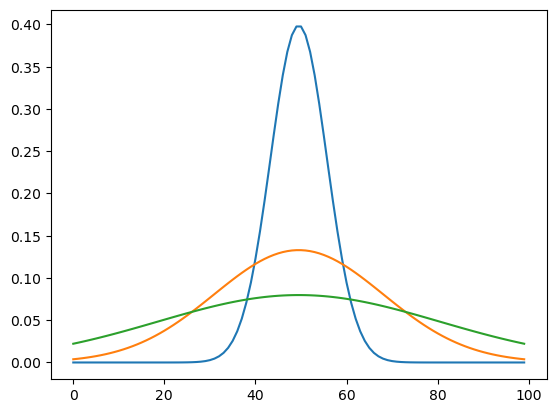

In [92]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2*np.pi)*sig)*np.exp(-0.5 * (1./sig*(x - mu))**2)

for mu, sig in [(0, 1), (0, 3), (0, 5)]: #(mean, stddev)
    plt.plot(gaussian(np.linspace(-8, 8, 100), mu, sig))

plt.show()

If we don't change the standard deviation but change the mean, the curve won't change but it will move to the left or right (as we can see in the code below).

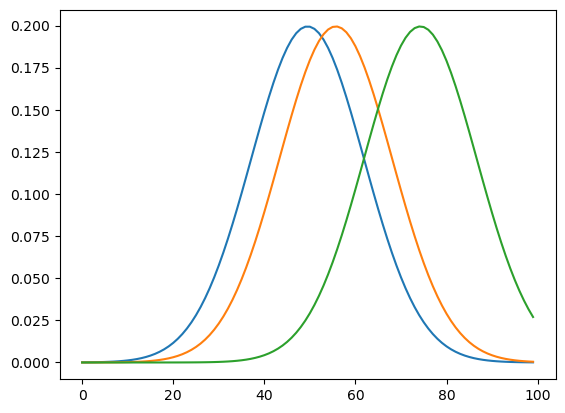

In [93]:
for mu, sig in [(0, 2), (1, 2), (4, 2)]: #(mean, stddev)
    plt.plot(gaussian(np.linspace(-8, 8, 100), mu, sig))

plt.show()

<a id="generatesample"></a>

## Generate a sample of random normal data

[Back To Top](#top)

In [94]:
# Create new, seeded random number generator (seeded so I will get the same values every time).
rng = np.random.default_rng(1)

# Generate 10,000 numbers on a standard normal distribution.
samples = rng.standard_normal(10000)
samples

array([ 0.34558419,  0.82161814,  0.33043708, ...,  0.30125226,
       -0.77127986,  0.18548426])

There are 4 different ways to check if the data is normally distributed (Statology, 2022) as follows:

1. Visual method using a histogram
2. Visual method using a Q-Q plot
3. Formal statistical test: Shapiro-Wilk test.
4. Formal statistical test: Kolmogorov-Smirnov test

I will perform each of these tests now.

<a id = "testnormal1"></a>
### Tests for Normal Distribution

[Back To Top](#top)

<a id="histtest1"></a>
### 1. Visual Method Using a Histogram

[Back To Top](#top)

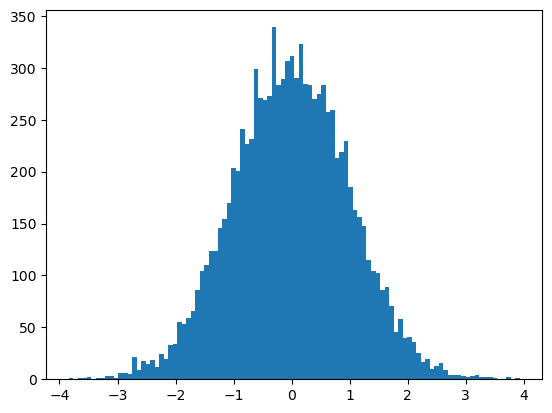

In [95]:
# Create a figure.
fig, ax = plt.subplots()

# Create histogram.
ax.hist(samples, bins=100)

plt.show()

#sns.displot(samples, bins=10, kde=True)


#### Visual Method Using a Histogram: Analysis

In the above histogram the data is clearly falling in the familiar bell-shaped curve that indicates a normal distribution. There are anomalies but in general it is the shape of a normal distribution.

<a id = "qqplottest1"></a>
### 2. Visual Method Using a Q-Q Plot

[Back To Top](#top)

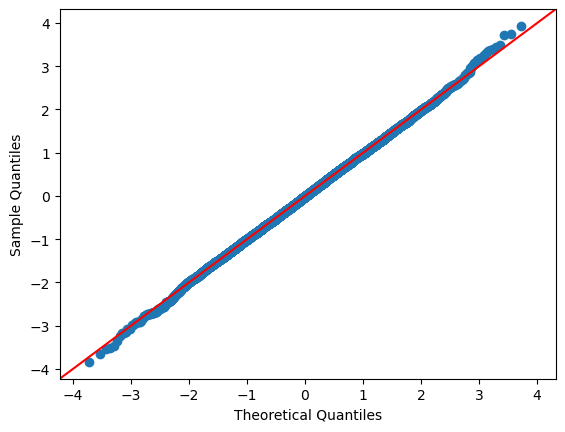

In [96]:
# Create a Q-Q plot. If the points in the plot are approximately in a straight diagonal line
# then it can be assumed that the data is normally distributed (Statology, 2022)
# Othewise it is not.

sm.qqplot(samples, line ='45')
py.show()

#### Visual Method Using a Q-Q Plot: Analysis

As expected, the data falls along the line diagonally. This shows that the data is normally distributed.

<a id = "shapirowilktest1"></a>
### 3. Formal Statistical Test: Shapiro-Wilk Test

[Back To Top](#top)

In [97]:
# Perform Shapiro-Wilk test for normality

stats.shapiro(samples)

C:\Users\elaine.tynan\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9997910261154175, pvalue=0.45775672793388367)

####  Formal statistical Shapiro-Wilk test: Analysis

In the Shapiro-Wilk Test we are testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses are as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

If the p-value calculated is greater than 0.05 (for a 95% confidence test) then the Null hypotheses cannot be rejected and therefore it would be concluded that the data is normally distributed, Otherwise, the null hypothesis is rejected, and the alternate hypotheses is assumed to be true.

With the above data and test, the p-value is approximately 0.46 which is significantly larger than 0.05. Therefore, the null Hypotheses is not rejected, and the data is concluded to be a Normal Distribution.

<a id = "kolmogorovsmirnovtest1"></a>
### 4.  Formal Statistical Test: Kolmogorov-Smirnov Test

[Back To Top](#top)

In [98]:
# Perform Kolmogorov-Smirnov test for normality

stats.kstest(samples, 'norm')


KstestResult(statistic=0.008431603741515858, pvalue=0.4732196155357008)

#### Formal statistical Kolmogorov-Smirnov test: Analysis
In the Kolmogorov-Smirno Test we are testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses are the same as for the Shapiro-Wilk Test and is as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

If the p-value calculated is greater than 0.05 (for a 95% confidence test) then the Null hypotheses cannot be rejected and therefore it would be concluded that the data is normally distributed, Otherwise, the null hypothesis is rejected, and the alternate hypotheses is assumed to be true.

With the above data and test, the p-value is just over 0.47. This is again significantly larger than 0.05. Therefore, the null Hypotheses is not rejected, and the data is concluded to be a Normal Distribution.

<a id = "meanmedianmode"></a>
### Test if Mean, Mode and Median are equal

[Back To Top](#top)

If a dataset is normally distributed the mean, mode and median would all be equal. As we can see from the code below, the mean and median are very close in value(-0.0109 & -0.0094). The Mode shows that there are no repeated values and therefore is not relevant in this case.

*Note*: I used a seed when generating the values so the values (and analysis) should be the same every time.

In [99]:
mean_val = samples.mean()
print(mean_val)

median_val = np.median(samples)
print(median_val)

mode_val = stats.mode(samples)
print(mode_val)

-0.010912901120845201
-0.009417870879801062
ModeResult(mode=array([-3.83786214]), count=array([1]))


<a id = "generatenonnormal"></a>
## Generate Non-normal Distribution

[Back To Top](#top)

Next, I will generate a sample of data that is not Normally distributed and repeat the above test to verify that they are correct.

In this example the distribution is Chi-square.

In [100]:
# Create new, seeded random number generator.
rng = np.random.default_rng(1)

# Generate 10,000 numbers on a chisquare distribution.
non_norm_sample = rng.chisquare(3, 10000)
non_norm_sample

array([3.16232991, 3.12242578, 4.88646385, ..., 3.55733541, 4.48673887,
       0.60793278])

<a id = "testnormal2"></a>
### Tests for Normal Distribution

[Back To Top](#top)

<a id = "histtest2"></a>
### 1. Visual Method Using a Histogram

[Back To Top](#top)

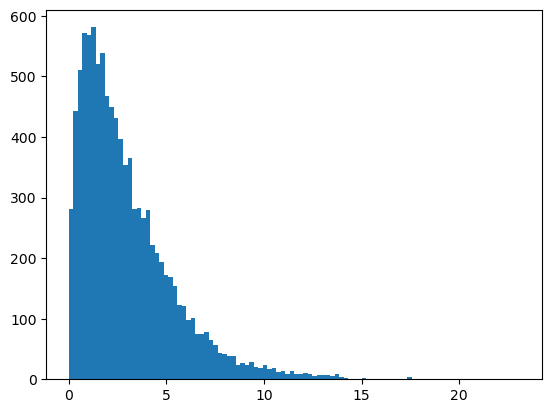

In [101]:
# Create a figure.
fig, ax = plt.subplots()

# Create histogram.
ax.hist(non_norm_sample, bins=100)

plt.show()

#### Visual Method Using a Histogram: Analysis

In the above histogram the data is clearly not falling in the familiar bell-shaped curve that indicates a normal distribution. This shows the data is not a normal distribution.

<a id = "qqplottest2"></a>
### 2. Visual Method Using a Q-Q Plot

[Back To Top](#top)

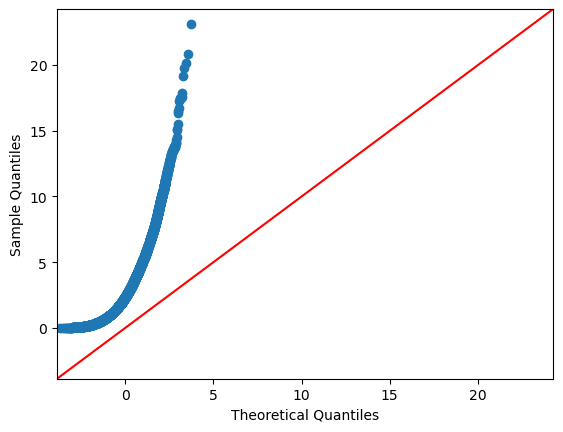

In [102]:
# Create a Q-Q plot. If the points in the plot are approximately in a straight diagonal line
# then it can be assumed that the data is normally distributed (Statology, 2022).
# Othewise it is not.

sm.qqplot(non_norm_sample, line ='45')
py.show()

#### Visual Method Using a Q-Q Plot: Analysis

As expected, the data does not fall along the line diagonally. This shows that the data is not normally distributed.

<a id = "shapirowilktest2"></a>
### 3. Formal Statistical Test: Shapiro-Wilk Test

[Back To Top](#top)

In [103]:
# Perform Shapiro-Wilk test for normality

stats.shapiro(non_norm_sample)

ShapiroResult(statistic=0.8644645810127258, pvalue=0.0)

####  Formal statistical Shapiro-Wilk test: Analysis

In the Shapiro-Wilk Test we are testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses are as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

If the p-value calculated is greater than 0.05 (for a 95% confidence test) then the Null hypotheses cannot be rejected and therefore it would be concluded that the data is normally distributed, Otherwise, the null hypothesis is rejected, and the alternate hypotheses is assumed to be true.

With the above data and test, the p-value is 0.0 which is less than 0.05. Therefore, the null Hypotheses is rejected, and the data is concluded to not be a Normal Distribution.

<a id = "kolmogorovsmirnovtest2"></a>
### 4.  Formal Statistical Test: Kolmogorov-Smirnov Test

[Back To Top](#top)

In [104]:
# Perform Kolmogorov-Smirnov test for normality

stats.kstest(non_norm_sample, 'norm')

KstestResult(statistic=0.6424763266401681, pvalue=0.0)

####  Formal statistical Kolmogorov-Smirnov test: Analysis

In the Kolmogorov-Smirnov Test we are again testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses are as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

If the p-value calculated is greater than 0.05 (for a 95% confidence test) then the Null hypotheses cannot be rejected and therefore it would be concluded that the data is normally distributed, Otherwise, the null hypothesis is rejected, and the alternate hypotheses is assumed to be true.

With the above data and test, the p-value is again 0.0 which is less than 0.05. Therefore, as with the Shapiro-Wilk Test, the null Hypotheses is rejected, and the data is concluded to not be a Normal Distribution.

<a id = "normalkaggle"></a>
## Normally Distributed Data Sample from Kaggle

[Back To Top](#top)

I will now look at a dataset from Kaggle that is normally distributed.

The data has 2 columns one if the year and the second the profit earned in that year. On initial manual inspection there does not seem to be any pattern to the data. When the data is grouped into 'bins' it is clear that most of the  Profits fall into the middle categories (bins), giving the familiar bell-shaped curve.

In [105]:
# Normally distributed data from Kaggle
# Ref: https://www.kaggle.com/datasets/tinasoni/normal-distribution-data/discussion?resource=download&select=CompanyABCProfit.csv

df = pd.read_csv('data/CompanyABCProfit.csv')
df

,Year,Profit
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
195,2016,988
196,2017,895
197,2018,-178
198,2019,543


<a id = "testnormal3"></a>
## Tests for Normal Distribution

<a id = "histtest3"></a>
### 1. Visual Method Using a Histogram

[Back To Top](#top)

In [106]:
mu = df['Profit'].mean()
stddev = df['Profit'].std()
x = df.loc[0]['Profit']

# e is a mathematical constant approximately equal to 2.71828183
e= 2.71828183

firstpart = (1 / (stddev*(math.sqrt(2 * math.pi))))
secondpart = ((x-mu)**2)/(2*(stddev**2))
pdf = firstpart * (e**(-1 *secondpart))
print(pdf)

0.00036186425705854176


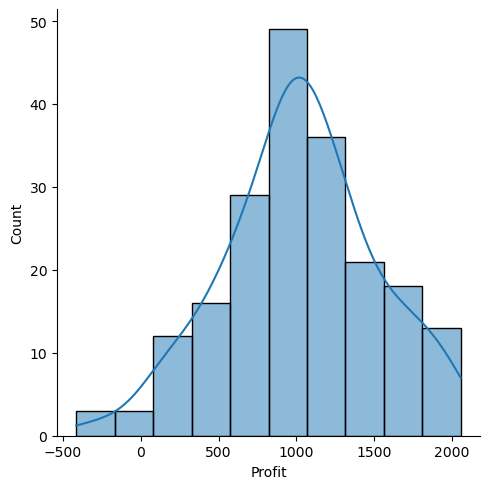

In [107]:
# Using seaborn to draw the bar chart with a line curve to show the bell shape

sns.displot(df['Profit'], bins=10, kde=True)
plt.show()

#### Visual Method Using a Histogram: Analysis

In the above histogram the data is falling in the familiar bell-shaped curve that indicates a normal distribution.

<a id = "stepbystephist"></a>
### Step-by-Step Drawing of Histogram

[Back To Top](#top)

This is the steps involved in drawing a histogram for the data:

1. Create evenly spaced bins

2. Get a count of all values that fall into each bin

3. Draw a histogram of the counts

I will do this in the following code.

In [108]:
# Sorting the data based on the profit column
df_sorted = df.sort_values(by=['Profit'])
df_sorted

,Year,Profit
167,1988,-413
105,1926,-244
197,2018,-178
176,1997,26
146,1967,49
...,...,...
58,1879,1973
168,1989,1996
101,1922,2027
157,1978,2045


In [109]:
# Put in a new index column and replace existing index with new sorted index

num_rows = len(df)
print(num_rows)

df_sorted.insert(0, 'New_ID', range(0, 200))
df_sorted.set_index('New_ID', inplace=True)
df_sorted

200


,Year,Profit
New_ID,,
0,1988,-413
1,1926,-244
2,2018,-178
3,1997,26
4,1967,49
...,...,...
195,1879,1973
196,1989,1996
197,1922,2027


In [110]:
# Put data into bins
# Ref: https://www.statology.org/data-binning-in-python/
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.cut.html

df_sorted['bins'] = pd.cut(df_sorted['Profit'], 10)
df_sorted

,Year,Profit,bins
New_ID,,,
0,1988,-413,"(-415.468, -166.2]"
1,1926,-244,"(-415.468, -166.2]"
2,2018,-178,"(-415.468, -166.2]"
3,1997,26,"(-166.2, 80.6]"
4,1967,49,"(-166.2, 80.6]"
...,...,...,...
195,1879,1973,"(1808.2, 2055.0]"
196,1989,1996,"(1808.2, 2055.0]"
197,1922,2027,"(1808.2, 2055.0]"


In [111]:
# Get a count of the number of values that fall into each bin.
bin_vals = df_sorted['bins'].value_counts()
bin_vals

(821.0, 1067.8]       49
(1067.8, 1314.6]      36
(574.2, 821.0]        29
(1314.6, 1561.4]      21
(1561.4, 1808.2]      18
(327.4, 574.2]        16
(1808.2, 2055.0]      13
(80.6, 327.4]         12
(-415.468, -166.2]     3
(-166.2, 80.6]         3
Name: bins, dtype: int64

In [112]:
# Convert the series to a dataframe
df2 = bin_vals.to_frame()
df2['index1'] = df2.index
df2

,bins,index1
"(821.0, 1067.8]",49,"(821.0, 1067.8]"
"(1067.8, 1314.6]",36,"(1067.8, 1314.6]"
"(574.2, 821.0]",29,"(574.2, 821.0]"
"(1314.6, 1561.4]",21,"(1314.6, 1561.4]"
"(1561.4, 1808.2]",18,"(1561.4, 1808.2]"
"(327.4, 574.2]",16,"(327.4, 574.2]"
"(1808.2, 2055.0]",13,"(1808.2, 2055.0]"
"(80.6, 327.4]",12,"(80.6, 327.4]"
"(-415.468, -166.2]",3,"(-415.468, -166.2]"
"(-166.2, 80.6]",3,"(-166.2, 80.6]"


In [113]:
# Sort the values again, by the bins/buckets
df2_sorted = df2.sort_values(by=['index1'])
df2_sorted

,bins,index1
"(-415.468, -166.2]",3,"(-415.468, -166.2]"
"(-166.2, 80.6]",3,"(-166.2, 80.6]"
"(80.6, 327.4]",12,"(80.6, 327.4]"
"(327.4, 574.2]",16,"(327.4, 574.2]"
"(574.2, 821.0]",29,"(574.2, 821.0]"
"(821.0, 1067.8]",49,"(821.0, 1067.8]"
"(1067.8, 1314.6]",36,"(1067.8, 1314.6]"
"(1314.6, 1561.4]",21,"(1314.6, 1561.4]"
"(1561.4, 1808.2]",18,"(1561.4, 1808.2]"
"(1808.2, 2055.0]",13,"(1808.2, 2055.0]"


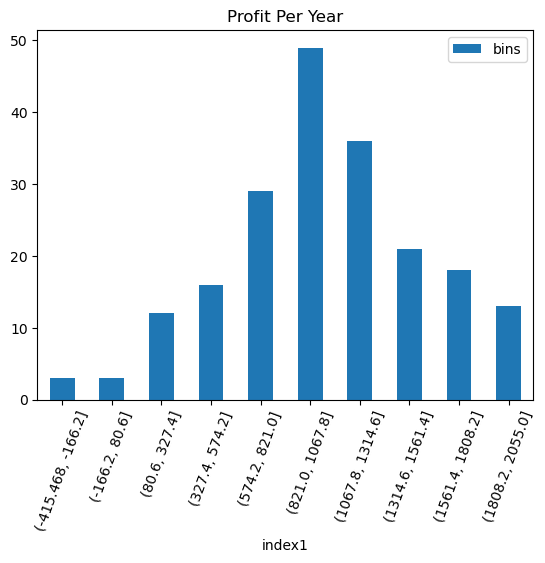

In [114]:
# Plot the data (Should be normally distributed)
ax = df2_sorted.plot.bar(x="index1", y="bins", rot=70, title="Profit Per Year");
plt.show()

<a id = "qqplottest3"></a>
### 2. Visual Method Using a Q-Q Plot

[Back To Top](#top)

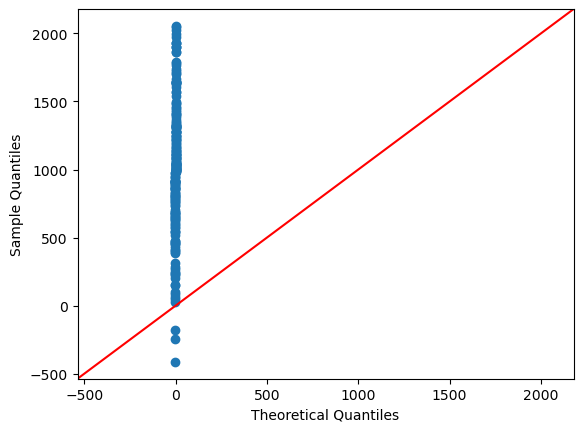

In [115]:
# Create a Q-Q plot. If the points in the plot are approximately in a straight diagonal line
# then it can be assumed that the data is normally distributed (Statology, 2022).
# Othewise it is not.

sm.qqplot(df_sorted['Profit'], line ='45')
py.show()

#### Visual Method Using a Q-Q Plot: Analysis

The data does not fall along the line diagonally.
The Q-Q plot is comparing the quantiles. So, in this case where the Theoretical Quantiles match the residuals it will give a straight vertical line which means the distribution is a good fit
Therefore, we can conclude that the data is not normally distributed. (Sbr, 2022)

<a id = "shapirowilktest3"></a>
### 3. Formal Statistical Test: Shapiro-Wilk Test

[Back To Top](#top)

In [116]:
# Perform Shapiro-Wilk test for normality

stats.shapiro(df_sorted['Profit'])

ShapiroResult(statistic=0.990578830242157, pvalue=0.21675562858581543)

####  Formal statistical Shapiro-Wilk test: Analysis

In the Shapiro-Wilk Test we are again testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses are as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

With the above data and test, the p-value is approximately 0.22 which is greater than 0.05. Therefore, the null Hypotheses cannot be rejected, and the data is concluded to be a Normal Distribution.

<a id = "kolmogorovsmirnovtest3"></a>
### 4.  Formal Statistical Test: Kolmogorov-Smirnov Test

[Back To Top](#top)

In [117]:
# Perform Kolmogorov-Smirnov test for normality

stats.kstest(df_sorted['Profit'], 'norm')

KstestResult(statistic=0.985, pvalue=0.0)

#### Formal statistical Kolmogorov-Smirnov test: Analysis
In the Kolmogorov-Smirnov Test we are again testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses are as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

With the above data and test, the p-value is 0.0 which is less than 0.05 indicating that the data is not a Normal Distribution.

This is in conflict with the Shapiro-Wilk Test. The Shapiro-Wilk Test concentrates on the tails of the data whereas the Kolmogorov-Smirov Test concentrates on the quantile, which is often in the middle. For this reason, the Shapiro-Wilk Test is preferred and thus we conclude that the data is actually normally distributed. (Gung, 2017)


<a id = "empiricalrules"></a>
## Test for Empirical Rules

[Back To Top](#top)

As stated above 68% of the data falls within one standard deviation of the mean, 95% falls within two standard deviations and 99% of the data falls within three standard deviations of the mean.

We will investigate this on the datasets we have.

**Note**: If a dataset follows the empirical rules this does not indicate that the dataset is normally distributed, it is simply a property of normally distributed data. Other datasets may also have this property.

<a id = "empiricalnormgenerated"></a>
### Empirical Rules on Normally Distributed Generated Data

[Back To Top](#top)

In [118]:
# Get mean and standard deviation
mean_val = samples.mean()
stddev = samples.std()

# Get number of rows initially
numrows = len(samples)
#print(numrows)

In [119]:
# mean +- 3 stddev
low = mean_val - 3 * stddev
high = mean_val + 3 * stddev

copy = samples[(samples >= low) & (samples <= high)]
new_numrows = len(copy)

percent = float(new_numrows)/float(numrows)*100
print(str(percent)+"%")

99.67%


In [120]:
# mean +- 2 stddev
low = mean_val - 2 * stddev
high = mean_val + 2 * stddev

copy = samples[(samples >= low) & (samples <= high)]
new_numrows = len(copy)

percent = float(new_numrows)/float(numrows)*100
print(str(percent)+"%")

95.58%


In [121]:
# mean +- 1 stddev
low = mean_val - stddev
high = mean_val + stddev

copy = samples[(samples >= low) & (samples <= high)]
new_numrows = len(copy)

percent = float(new_numrows)/float(numrows)*100
print(str(percent)+"%")

68.7%


<a id = "empiricalnormgenresults"></a>
#### Test Results of Empirical Rules on Normally Distributed Generated Data

[Back To Top](#top)

The values expected should be approximately 99.7%, 95% and 68%. The values from the normally distributed generated data were 99.67%, 95.58% and 68.7% which is accurate for normally distributed data.

<a id = "empiricalnonnormgenerated"></a>
### Empirical Rules on Non-Normally Distributed Generated Data

[Back To Top](#top)

In [122]:
# Get mean and standard deviation
mean_val = non_norm_sample.mean()
stddev = non_norm_sample.std()

# Get number of rows initially
numrows = len(non_norm_sample)
#print(numrows)

In [123]:
# mean +- 3 stddev
low = mean_val - 3 * stddev
high = mean_val + 3 * stddev

copy = non_norm_sample[(non_norm_sample >= low) & (non_norm_sample <= high)]
new_numrows = len(copy)

percent = float(new_numrows)/float(numrows)*100
print(str(percent)+"%")

98.3%


In [124]:
# mean +- 2 stddev
low = mean_val - 2 * stddev
high = mean_val + 2 * stddev

copy = non_norm_sample[(non_norm_sample >= low) & (non_norm_sample <= high)]
new_numrows = len(copy)

percent = float(new_numrows)/float(numrows)*100
print(str(percent)+"%")

95.38%


In [125]:
# mean +- 1 stddev
low = mean_val - stddev
high = mean_val + stddev

copy = non_norm_sample[(non_norm_sample >= low) & (non_norm_sample <= high)]
new_numrows = len(copy)

percent = float(new_numrows)/float(numrows)*100
print(str(percent)+"%")

# Test Code ran on all 9 empirical tests.
#count = 0
#for x in non_norm_sample:
#    if x < low or x > high:
#        print("Outlier:  "+str(x))
#        count += 1
#print("Num deleted: "+ str(count))

77.4%


<a id = "empiricalnonnormgenresults"></a>
#### Test Results of Empirical Rules on Non-Normally Distributed Generated Data

[Back To Top](#top)

The values expected for Normally distributed data should be approximately 99.7%, 95% and 68%. Remember, if the dataset has data in this distribution this does not indicate that the dataset is normally distributed. The values from this Chi-square distributed data were 98.3%, 95.38% and 77.4%. These values are accurate for the first 2 rules(3 and 2 standard deviations from the mean), but not accurate for the third rule (1 standard deviation from the mean).

<a id = "empiricalnormkaggle"></a>
### Empirical Rules on Normally Distributed Data from Kaggle

[Back To Top](#top)

In [126]:
# Get mean and standard deviation
mean_val = df['Profit'].mean()
stddev = df['Profit'].std()

# Get number of rows initially
numrows = len(df.index)
#print(numrows)

In [127]:
# mean +- 3 stddev
low = mean_val - 3 * stddev
high = mean_val + 3 * stddev

copy = df.drop(df[(df['Profit'] < low) | (df['Profit'] > high)].index)
new_numrows = len(copy.index)

percent = float(new_numrows)/float(numrows)*100
print(str(percent)+"%")

100.0%


In [128]:
# mean +- 2 stddev
low = mean_val - 2 * stddev
high = mean_val + 2 * stddev

copy = df.drop(df[(df['Profit'] < low) | (df['Profit'] > high)].index)
new_numrows = len(copy.index)

percent = float(new_numrows)/float(numrows)*100
print(str(percent)+"%")

96.5%


In [129]:
# mean +- 1 stddev
low = mean_val - stddev
high = mean_val + stddev

copy = df.drop(df[(df['Profit'] < low) | (df['Profit'] > high)].index)
new_numrows = len(copy.index)

percent = float(new_numrows)/float(numrows)*100
print(str(percent)+"%")

69.0%


<a id = "empiricalnormkaggleresults"></a>
#### Test Results of Empirical Rules on Normally Distributed Data from Kaggle

[Back To Top](#top)

The values expected should be approximately 99.7%, 95% and 68%. The values from the normally distributed generated data were 100%, 96.5% and 69% which is quite accurate for normally distributed data.

<a id = "skewness"></a>
## Test for Skewness (Symmetry)

[Back To Top](#top)

As stated above skewness measures the symmetry of a dataset and for a normally distributed dataset the skewness should be 0.

We will test this on our 3 datasets (normal generated, non-normal generated & normal from Kaggle).

Based on the general rule for Skewness as stated by Kilma (2021):
 - skewness < -1 or > 1  is highly skewed.
 - skewness between -1 and < -0.5 or between 0.5 and 1 is moderately skewed.
 - skewness is between -0.5 and 0.5 is approximately symmetric
 
 Our results (from the code below) are:
  - Normally distributed generated data at -0.005688, is symmetric
  - Chi-square distributed generated data at 1.6975,  is highly skewed. This indicates that the data is skewed right (because it is positive), which means that the tail on the right is longer than the tail on the left (NIST, 2012a).
  - Normally distributed data from Kaggle at -0.1289 is symmetric

<a id = "skewtest"></a>
### Test for Skewness on Datasets

[Back To Top](#top)

In [130]:
# Skewness of normally distributed generated data
stats.skew(samples)

-0.005687995577001298

In [131]:
# Skewness of Chi-square distributed generated data
stats.skew(non_norm_sample)

1.6975467881145987

In [132]:
# Skewness of normally distributed data from Kaggle
df.skew(axis = 0, skipna = True)

Year      0.000000
Profit   -0.128902
dtype: float64

<a id = "kurtosis"></a>
## Test for Kurtosis

[Back To Top](#top)

As stated above the kurtosis measures the size of the 2 tails combined. In Normal distribution Kurtosis is equal to 3.

We will test this on our 3 datasets (normal generated, non-normal generated & normal from Kaggle) by generating the excess kurtosis (3 - kurtosis).
 
 Our results (from the code below) are:
  - Normally distributed generated data at -0.0603, shows a kurtosis of slightly greater than 3 (3.0603), accurate for normally distributed data.
  - Chi-square distributed generated data at 4.4694, shows a kurtosis of significantly less than 3 (-1.4694) as it is not normally distributed.
  - Normally distributed data from Kaggle at -0.0479, shows a kurtosis of very slightly greater than 3 (3.0479), accurate for normally distributed data.

<a id = "kurtosistest"></a>
### Test for Kurtosis on Datasets

[Back To Top](#top)

In [133]:
# Kurtosis of normally distributed generated data
stats.kurtosis(samples)

0.060313400909711934

In [134]:
# Kurtosis of Chi-square distributed generated data
stats.kurtosis(non_norm_sample)

4.469404092270936

In [135]:
# Kurtosis of normally distributed data from Kaggle
df.kurtosis(axis = 0)

Year     -1.200000
Profit   -0.047937
dtype: float64

<a id = "probdensityfunc"></a>
## The Probability Density Function

[Back To Top](#top)

$$ \frac{1}{\sigma \sqrt(2 \pi)} | e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

Normal Distribution is represented by the Probability Density Function, but what does this mean?

Nykamp (n.d.) gives the example of guessing numbers. If you were asked to guess a number between 1 and 10, the probability of any number being the correct answer is easily calculated to be 1/10 (or 0.1 or 10%).
*That is assuming the correct answer is a whole number (integer).*
The sum of the probability of all the numbers will always give us 1. In this case the probably of 1 = 0.1, 2 is 0.1, etc. If we add them all we get 1. It is the same as asking 'If a number were picked from a list of numbers between 1 to 10 inclusive, what is the probability that any number between 1 and 10 will be picked?' obviously this is a certainty, so the probability is 1 or 100%.

What if you were asked to guess any number between 0 and 1 exclusive? Now the previous assumption can no longer be applied. Since there are an infinite amount of numbers between 0 and 1, then how do we get a probability of any one of them being picked and still hold true the rule that the sum of all probabilities is 1? Nykamp (n.d.) suggests "*we need to think about the probability that x is close to a single number*", this is what the probability Density Function does.

Below is code using the above formula to calculate the probability of a number close to the first value in the profit column in our dataframe occurring. the result is 0.000362 (approximately), which is less than 4 in 10,000 chances of a number close to it occurring. On a continuous scale of numbers this is not a bad probability.

In [136]:
# Calculating the pdf for the first value in the profit column.

mu = df['Profit'].mean()
stddev = df['Profit'].std()
x = df['Profit'][0]

# The symbol e is the base of the natural logarithm and is a mathematical constant approximately equal to 2.71828183
e = 2.71828183

firstpart = (1 / (stddev*(math.sqrt(2 * math.pi))))
lastpart = ((x-mu)**2)/(2*(stddev**2))

pdf = firstpart  * (e**(-1 * lastpart))
print(pdf)

0.00036186425705854176


<a id = "gendatafrompdf"></a>
### Generating Normal Data from the Mean and Standard Deviation Using PDF

[Back To Top](#top)

Here I will generate normally distributed data using the Probability Density Function. This is similar code to Teena (2020) when she discussed the Probability Density Function.

I will then create a graph from the data to verify that it is normally distributed.

In [137]:
# Probability Density Function (PDF) (same as above, but in a function)
def PDF(x, mean, std_dev):
    probability = 1.0 / math.sqrt(2 * 3.141592*(std_dev)**2)  # first part of equation
    probability *= math.exp(-0.5 * ((x - mean)/std_dev)**2)  # multiply first part by last part
    return probability

# Create Fake Normally Distributed Data with Mean of 178.4, and Std_Dev of 7.59
# This is the average and standard deviation for height in cm of male adults born
# between 1980 and 1994, study carried out in 2016. Min height = 155.6 and 
# max height = 201.2 (Roser et al., 2013)

# Note: I have given the values such as min, max and mean names ending in _val as the
# names min, max, mean, etc were clashing with function names in python and causing 
# errors in previously working code. I have replicated these changes throughout the notebook.

x_vals = []
mean_val = 178.4
stddev = 7.59
min_val = 155
max_val = 202
for x in range(min_val, max_val):
    y = PDF(x, mean_val, stddev)
    
    # Create data by replicating x according to it's probability
    N_vals_at_y = int(round(y * 1001, 0))
    for i in range(N_vals_at_y):
        x_vals.append(x)

# Finding mean
the_mean = round(sum(x_vals)/len(x_vals), 2)

# Finding Standard Deviation
std_dev = 0.0
N = len(x_vals)
for x in x_vals:
    std_dev += (x - the_mean)**2

std_dev /= N
std_dev = math.sqrt(std_dev)
std_dev = round(std_dev, 2)
 
print(f'The heights of {N} males was simulated using the PDF function.')
print(f'The mean is {the_mean}')
print(f'The standard deviation is {std_dev}')

The heights of 1002 males was simulated using the PDF function.
The mean is 178.4
The standard deviation is 7.53


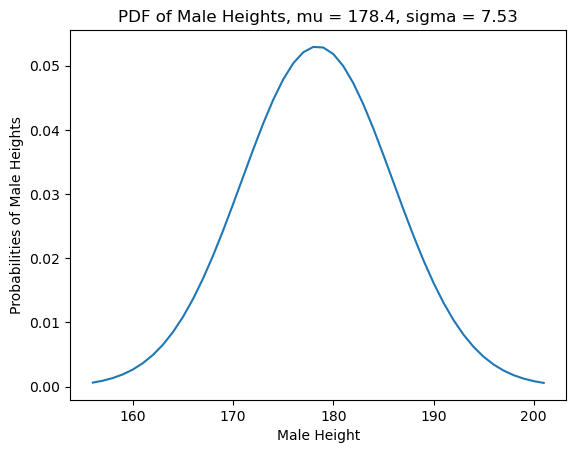

In [138]:
# Create normal distribution curve of the above using the pdf function in scipy.stats.norm
figure,ax = plt.subplots()
  
# x_vals from above
y_vals = []

for x in x_vals:
    y = stats.norm.pdf(x=x, loc=the_mean, scale=std_dev)
    y_vals.append(y)

ax.set_xlabel('Male Height')
ax.set_ylabel('Probabilities of Male Heights')
ax.set_title('PDF of Male Heights, mu = '+str(the_mean)+', sigma = '+str(std_dev))
plt.plot(x_vals, y_vals)
plt.show()

<a id = "cumuldistfunc"></a>
## The Cumulative Distribution Function

$$ {P(X \le x)} $$

[Back To Top](#top)

The Cumulative Distribution Function (CDF) is derived from the probability Density function and "gives the probability of finding the random variable at a value less than or equal to a given cutoff, ie, P(X ≤ x)" (Teena, 2020). Teena (2020) made it even clearer when she said  the CDF can "help us determine ... ranges of probabilities when data follows a normal distribution". It is a function that returns the probability of a value occurring within a given range.

In [139]:
# Cumulative Distribution Function (CDF)
# Get the probability of each value from left to right occuring and add them
# together for the probability of the value occuring within the range
def CDF(mean=0, std_dev=1, x_left=-4, x_right=4, width=0.0001):
    CDF = 0
 
    # calculate the number of panels (+ 1 includes x_right)
    the_range = int((x_right - x_left) / width) + 1
    
    # Call PDF for each value of x_left to x_right
    for i in range(the_range):
        x = x_left + i * width  # current x value
        y = PDF(x, mean, std_dev)  # probability of this panel
        panel = y * width  # this panel area under PDF curve
        CDF += panel  # sum panel areas = CDF
       
    return CDF

In [140]:
# Using the data from above (mean, standard deviation, min, max and N) get the 
# probabilities of various ranges of height for males

the_range = max_val - min_val +1
median_val = min_val+(the_range/2)
step = the_range / N
values = [
    (mean_val, stddev, min_val, max_val),
    (mean_val, stddev, min_val, median_val),
    (mean_val, stddev, median_val, max_val)]
 
for x in values:
    cd_out = round(CDF(mean=x[0], std_dev=x[1], 
                       x_left=x[2], x_right=x[3], width=step), 2)
    print(f'Probability of Male Heights being {x[2]} ≤ x ≤ {x[3]} is {cd_out}')

Probability of Male Heights being 155 ≤ x ≤ 202 is 1.0
Probability of Male Heights being 155 ≤ x ≤ 179.0 is 0.53
Probability of Male Heights being 179.0 ≤ x ≤ 202 is 0.47


<a id = "probpointfunc"></a>
## The Probability Point Function

$$ {Pr[X \le G(\alpha)] = \alpha} $$

[Back To Top](#top)

The Probability Point Function (PPF) is the inverse of the CDF. It can sometimes be referred to as the Inverse Distribution Function (NIST, 2012b). It takes a "probability, and returns a number that has that probability of occurring under a standard normal distribution" (Kumar, 2022).
This is a one tailed test as it only gives you less than or equal to.

In [141]:
# Generate a number with 95% chance that a randomly generated number will be
# less than or equal to it in a standard normal distribution (mean  = 0, std_dev = 1)

stats.norm.ppf(0.95)

1.6448536269514722

In [142]:
# Lets try the inverse and find the proability that a randomly generated number will be
# less than or equal to 1.6448536269514722 (will be 95%, see above)
stats.norm.cdf(1.6448536269514722)

0.95

In [143]:
# Using the mean and standard deviation from the Male height example get a height 
# that has a 95% chance of a random number being less than or equal to it.

# In this case there is a 95% probability of a random number in this distribution 
# being 190.88cm (approx) or less.

stats.norm.ppf(0.95, loc = mean_val, scale = stddev)

190.88443902856167

In [144]:
# Alternate way to do the same thing.

from statistics import NormalDist

NormalDist(mu=mean_val, sigma=stddev).inv_cdf(0.95)
# 13.289707253902943

190.88443902856167

<a id = "centrallimit"></a>
## Central Limit Theorem

[Back To Top](#top)

The Central Limit Theorem states that if you take enough samples from a dataset the samples means will be normally distributed even if the original dataset is not. (Turney, 2022)

For random samples from the dataset, the sample means is:

$$ {\mu_\bar{x} = \mu} $$

And the standard deviation is:

$$ {\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} }$$

(Sullivan, 2016)

<a id = "clt-example"></a>
### Example: The distribution of the sample tends towards the normal distribution as the sample size increases.

With the below code we can see when generating random numbers and getting their mean, as the samples get larger the data tends towards a normal distribution. (Code from Geeksforgeeks, 2021)

[Back To Top](#top)

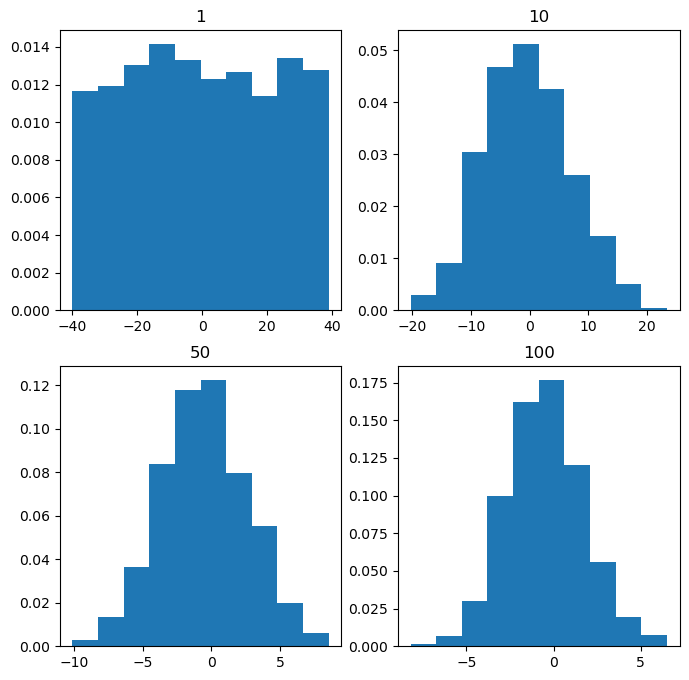

In [145]:
# number of sample
num = [1, 10, 50, 100]

# list of sample means
means = [] 
 
# Generating 1, 10, 50, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    np.random.seed(1)
    x = [np.mean(np.random.randint(-40, 40, j)) for _i in range(1000)]
    means.append(x)
k = 0
 
# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()

<a id = "clt-chisquare"></a>
### Central Limit Theorem Example on Chi-Square Distributed Data

Using the data that I generated above that I showed to be non-normal (Generated as a Chi-square Distribution), random samples of that data will be taken repeatedly and the mean of these will be calculated. The initial histogram below is of the data as a whole and clearly shows that it is not normally distributed. The histograms that follow show that as the number of samples increase the distribution of the data tends towards a normal distribution

[Back To Top](#top)

<a id = "cltplotoriginal"></a>
#### Original Data Plotted

[Back To Top](#top)

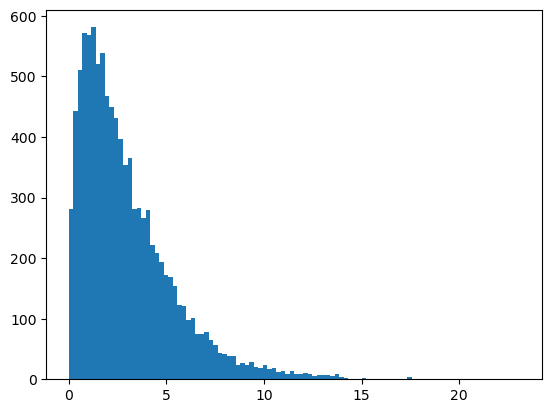

In [146]:
# Histogram of chi-square distributed data from above (shows it is not normally distributed)

# Create a figure.
fig, ax = plt.subplots()

# Create histogram.
ax.hist(non_norm_sample, bins=100)

plt.show()

<a id = "cltplotsamplemeans"></a>
#### Mean of Samples Plotted

[Back To Top](#top)

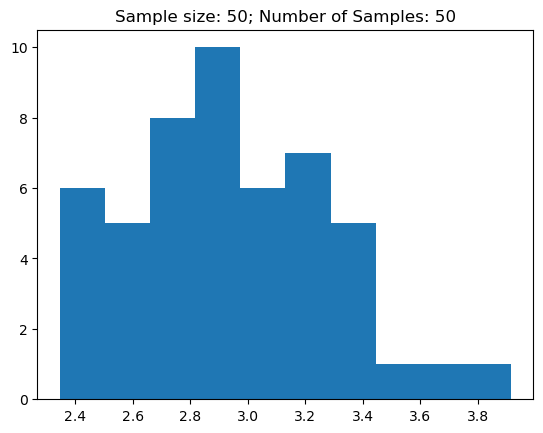

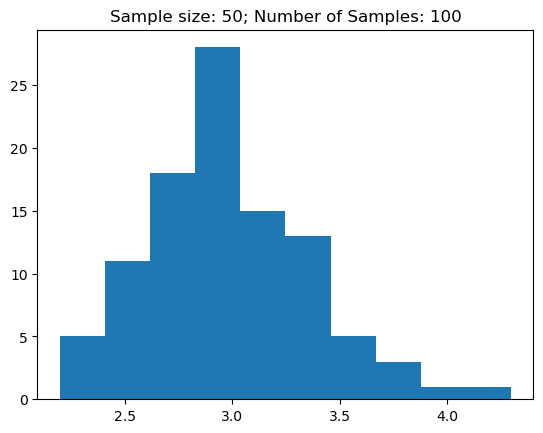

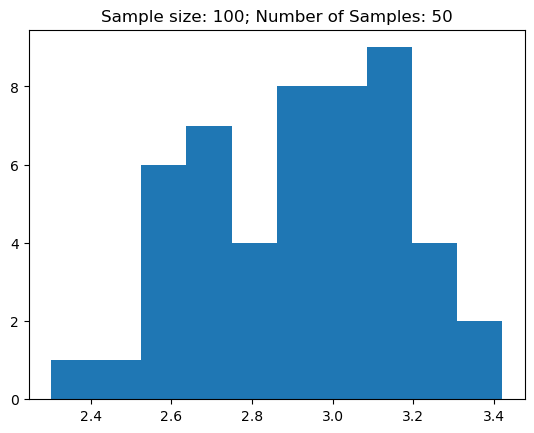

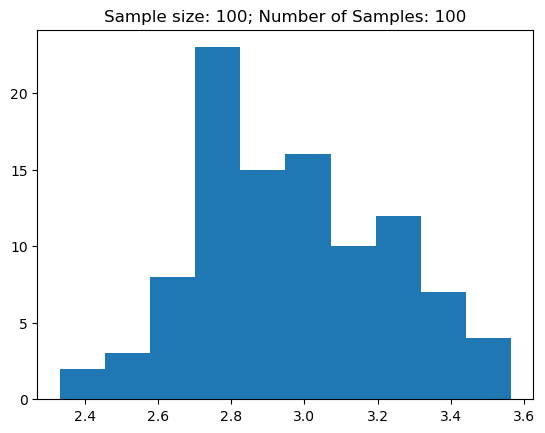

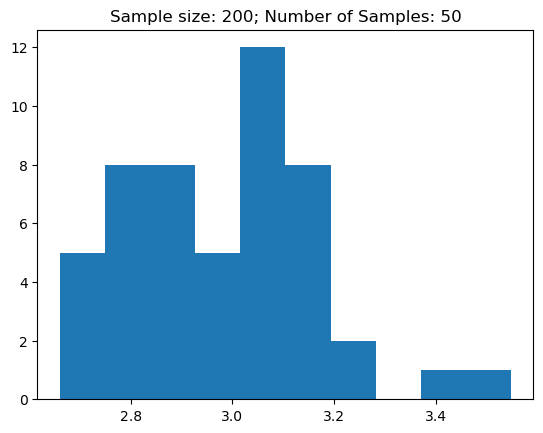

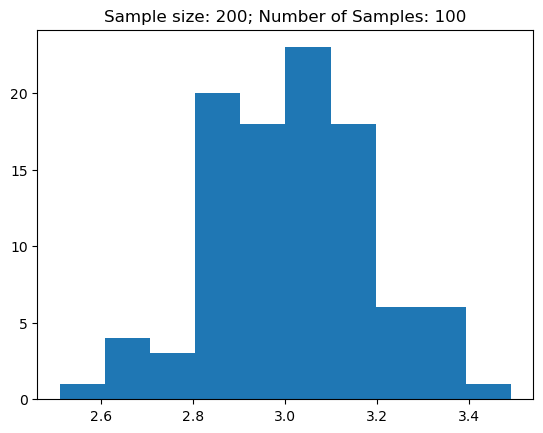

In [147]:
#non_norm_10 = non_norm_sample.sample(n=10)

non_norm_10 = np.random.choice(non_norm_sample, 10)
non_norm_50 = np.random.choice(non_norm_sample, 50)
non_norm_100 = np.random.choice(non_norm_sample, 100)
non_norm_150 = np.random.choice(non_norm_sample, 150)

# Get n random values from the chi square array and get their mean.
# Do that x times and then do a histogram to see if it is falling into a normal distribution
def do_central_limit_theorem_test(sample_size, number_of_samples):
    means = []
    for i in range(number_of_samples):
        means.append(np.mean(np.random.choice(non_norm_sample, sample_size)))

    # Create a figure.
    fig, ax = plt.subplots()

    # Create histogram.
    ax.hist(means, bins=10)
    
    plt.title(f"Sample size: {sample_size}; Number of Samples: {number_of_samples}")
    plt.show()
    
do_central_limit_theorem_test(50, 50)
do_central_limit_theorem_test(50, 100)
do_central_limit_theorem_test(100, 50)
do_central_limit_theorem_test(100, 100)
do_central_limit_theorem_test(200, 50)
do_central_limit_theorem_test(200, 100)

<a id="conclusion"></a>
## Conclusion

[Back To Top](#top)

The Normal Distribution is the most common distribution of data in statistics. Even those that have never heard of it will most likely have seen it or used it. It can be something as simple as the height of 7-year-olds in a class or club. It is very easy to use and visualise, but it can be used in quite complex data analytics.

The Normal distribution is symmetrical around its mean and provides a bell shape curve that most people are familiar with. The Empirical rules state that 99% of data falls within three standard deviations of the mean in a normal distribution. Similarly, 99.7% falls withing two standard deviations and 68% falls within one standard deviation.

# Bibliography

[Back To Top](#Contents)

CFI Team, (2022) Normal Distribution: Also known as Gaussian or Gauss distribution. Available at: https://corporatefinanceinstitute.com/resources/data-science/normal-distribution/ (Accessed: 08/12/2022)

Chen, J, (2022) Normal Distribution: What It Is, Properties, Uses, and Formula. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp (Accessed: 15 November 2022)

Evans. J.R, (2017) Business Analytics. 2nd Ed. Harlow Essex: Pearson

Geeksforgeeks, (2021) Python – Central Limit Theorem. Available at: https://www.geeksforgeeks.org/python-central-limit-theorem/ (Accessed 07 January 2023)

Gung, R.M. (2017) Inconsistent normality tests: Kolmogorov-Smirnov vs Shapiro-Wilk. Available at: https://stats.stackexchange.com/questions/299012/inconsistent-normality-tests-kolmogorov-smirnov-vs-shapiro-wilk (Accessed: 26 December 2022)

Kenton, L. (2022) The Basics of Probability Density Function (PDF), With an Example. Available at: https://www.investopedia.com/terms/p/pdf.asp#:~:text=Probability%20density%20functions%20are%20a,outcomes%20lying%20below%20the%20curve. (Accessed: 30 December 2022)

Kilma, K. (2021) Normality Testing - Skewness and Kurtosis. Availbale at: https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241 (Accessed: 31 December 2022)

Kumar, A., (2022) Generate Random Numbers & Normal Distribution Plots. Available at: https://vitalflux.com/generate-random-numbers-normal-distribution-plots/#:~:text=ppf%20function%20takes%20as%20input,1%20for%20standard%20normal%20distribution. (Accessed: 02 January 2023)

La Trobe university, (2022) Standard normal distribution and probability. Available at: https://latrobe.libguides.com/maths/probability-and-the-normal-distribution#:~:text=Once%20the%20scores%20of%20a,particular%20value%20can%20be%20found. (Accessed 30 December 2022)

Lane, D.M., (2014) Online Statistics Education: A Multimedia Course of Study. Available at: http://onlinestatbook.com/ (Accessed: 04 January 2023)

NIST (2012) Measures of Skewness and Kurtosis. Available at: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=The%20skewness%20for%20a%20normal,data%20that%20are%20skewed%20right. (Accessed: 31 December 2022)

NIST (2012) Related Distributions. Available at: https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm (Accessed: 02 January 2023)

Nykamp D.Q., (n.d.) The idea of a probability density function. Available at: http://mathinsight.org/probability_density_function_idea (Accessed 30 December 2022)

Roser, M., Appel, C., and Ritchie, H., (2013) Human Height. Avaiable at: 'https://ourworldindata.org/human-height' (Accessed 02 January 2023)

Sbr, A,. (2022) Why is my Normal Q-Q Plot of residuals a vertical line? Available at: https://stackoverflow.com/questions/72984094/why-is-my-normal-q-q-plot-of-residuals-a-vertical-line#:~:text=Regardless%2C%20if%20your%20Q%2DQ%20plot,from%20a%20normal%20distribution%20match. (Accessed 26 December 2022)

Sharma, S. (2019) Normal Distribution. Available at: https://www.kaggle.com/code/gadaadhaarigeek/normal-distribution (Accessed: 31 December 2022)

Statology, (2022) How to Test for Normality in Python (4 Methods). Available at: https://www.statology.org/normality-test-python/#:~:text=(Visual%20Method)%20Create%20a%20Q%2DQ,assumed%20to%20be%20normally%20distributed.(Accessed 26 December 2022)

Sullivan, L., (2016) The Role of Probability: Central Limit Theorem. Available at: https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html#:~:text=The%20central%20limit%20theorem%20states,will%20be%20approximately%20normally%20distributed. (Accessed: 06 January 2022)

Teena, M. (2020) Normal Distribution: An Introductory Guide to PDF and CDF. Available at: https://integratedmlai.com/normal-distribution-an-introductory-guide-to-pdf-and-cdf/ (Accessed: 01 January 2023)

Turney, S., (2022) Central Limit Theorem | Formula, Definition & Examples. Available at: https://www.scribbr.com/statistics/central-limit-theorem/ (Accessed 07 January 2022)